In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [14]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Styling and Themes in seaborn
set_style() darkgrid, whitegrid, dark, white, ticks

<function matplotlib.pyplot.show(close=None, block=None)>

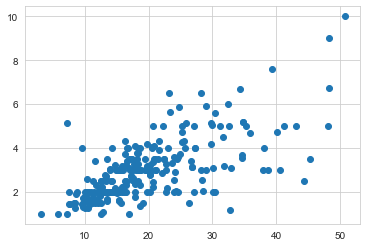

In [22]:
plt.scatter(tips.total_bill, tips.tip)
sns.set_style('whitegrid')
plt.show

### 1. Biểu đồ xu hướng<br>
- seaborn.lmplot: plot data and regression mode fits across a FacetGrid

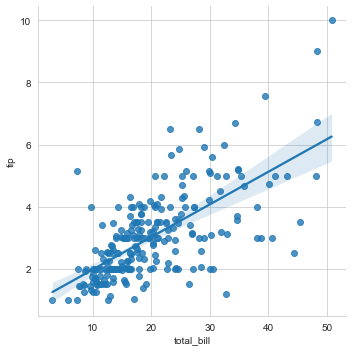

In [23]:
sns.lmplot(x='total_bill', y='tip', data=tips)
plt.show()
# Giống scatter nhưng có chỉ ra xu hướng của dữ liệu, và có mối quan hệ tuyến tính 1 đường thẳng

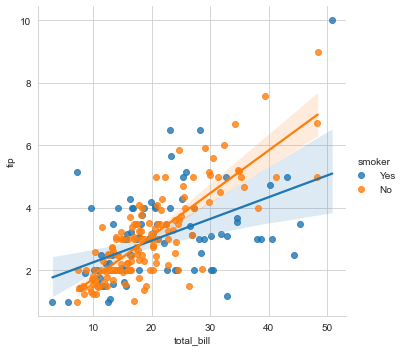

In [24]:
#hue: smoker có 2 nhóm hút và không hút, hue giúp tách biệt 2 nhóm, chia dữ liệu thành nhiều nhóm
sns.lmplot(x='total_bill', y='tip', data=tips, hue='smoker')


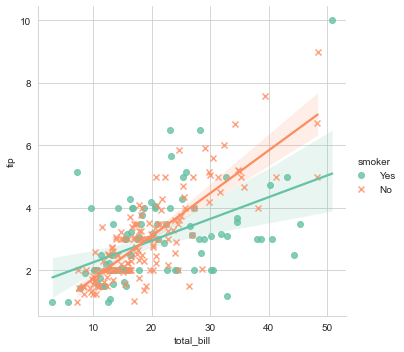

In [25]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', data = tips, markers = ['o', 'x'], palette='Set2', legend=True)
#hue nằm trên cùng 1 axes

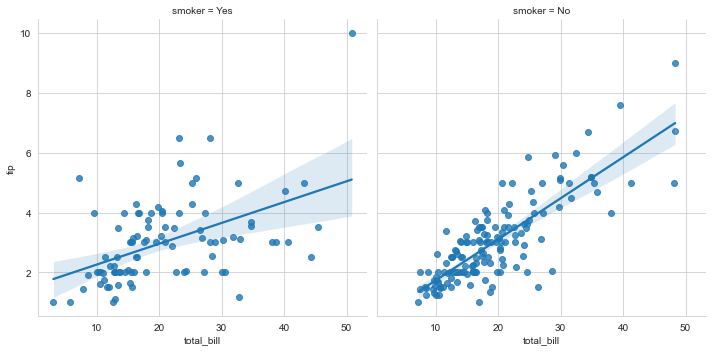

In [26]:
sns.lmplot(x='total_bill', y='tip', col='smoker', data=tips)
#row: 1 trên 1 dưới, 2 row khác nhau
#col: chia chiều ngang 

### 2. Biểu đồ phân bố:<br>
    seaborn.violinplot: kết hợp boxplot độ phân bố dữ liệu

In [28]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:ylabel='total_bill'>

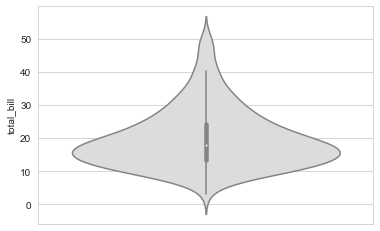

In [30]:
#sư phân bố của thuộc tính total_bill
#cho biết sự phân bố
sns.violinplot(y=tips['total_bill'], palette='coolwarm')
#Khoảng 0.5 có khoáng 1 giá trị, ở khỏng 9 đến 10 đô hơn phân bố nhiều
#điểm màu trắng là median: chia đôi dữ liệu, sl hóa đơn phía trên bằng phía dưới


In [31]:
tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

<AxesSubplot:xlabel='day', ylabel='total_bill'>

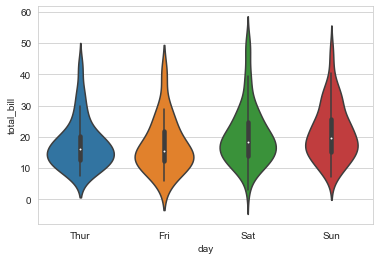

In [33]:
sns.violinplot(x = 'day', y='total_bill', data=tips)
#cn khách hàng có xu hướng chi tiền nhiều hơn, t7 sự phân bố rải rảt hơn, có nhiều loại kh hơn, 0.5, 80

<AxesSubplot:xlabel='day', ylabel='total_bill'>

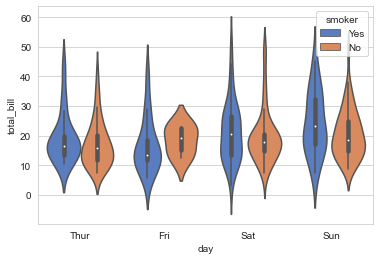

In [34]:
sns.violinplot(x = 'day', y='total_bill', data=tips, hue='smoker', palette='muted')
#t6 hóa đơn không hút thuốc hẹp hơn, ng hút thuốc độ giao động cao hơn`

<AxesSubplot:xlabel='day', ylabel='total_bill'>

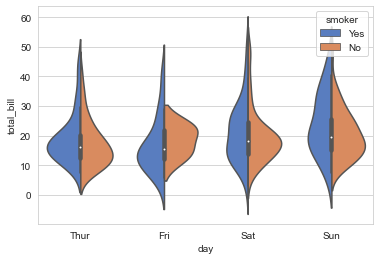

In [35]:
sns.violinplot(x = 'day', y='total_bill', data=tips, hue='smoker', palette='muted', split=True)


<AxesSubplot:xlabel='time', ylabel='total_bill'>

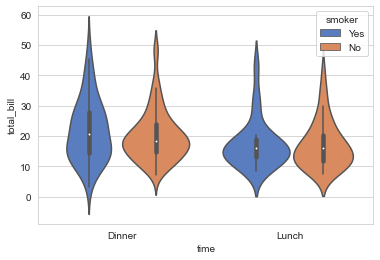

In [38]:
sns.violinplot(x = 'time', y='total_bill', data=tips, hue='smoker', palette='muted', order=['Dinner','Lunch'])
#order sắp xếp theo thứ tự 

### 3. Biểu đồ tần số

<AxesSubplot:xlabel='sex', ylabel='count'>

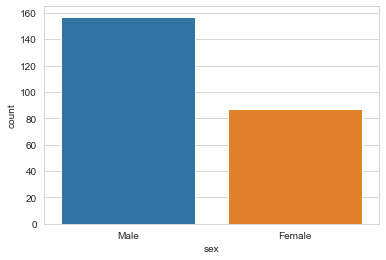

In [39]:
sns.countplot(x='sex', data=tips)

In [41]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [43]:
# female = tips[tips['sex']=='Female']['sex'].count()
# male = tips[tips['sex']=='Male']['sex'].count()
# plt.bar(['Female', 'Male'], [])

<AxesSubplot:xlabel='sex', ylabel='count'>

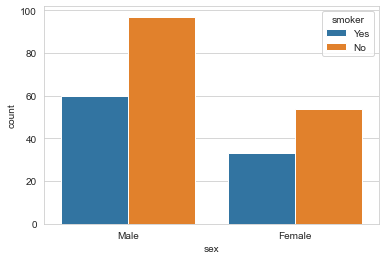

In [44]:
sns.countplot(x='sex', hue = 'smoker', data=tips) 

<AxesSubplot:xlabel='count', ylabel='sex'>

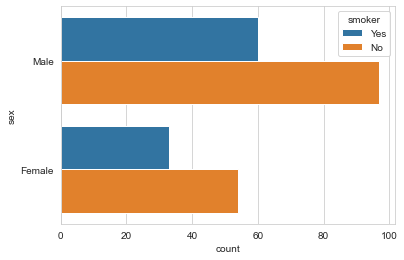

In [45]:
sns.countplot(y='sex', hue = 'smoker', data=tips) 

### 4. Biểu đồ heatmap

In [46]:
uniform_data = np.random.rand(10,12)
uniform_data

array([[8.60612265e-02, 8.09014160e-01, 5.01964625e-01, 7.11567653e-01,
        1.96881888e-01, 2.83671961e-01, 8.95497084e-01, 4.30574072e-01,
        9.17892690e-01, 9.84086186e-01, 7.50229386e-04, 8.44489238e-01],
       [5.17606666e-01, 5.99958817e-01, 7.46392306e-01, 4.10942637e-01,
        2.15346907e-02, 1.81255274e-01, 8.88061686e-01, 6.92840509e-01,
        5.32478441e-01, 5.16615273e-01, 4.75682520e-01, 6.49855239e-01],
       [6.60506540e-01, 3.36580976e-01, 8.90962257e-01, 3.06128231e-01,
        7.46923204e-01, 7.96968544e-01, 3.74790211e-01, 7.80932166e-01,
        9.58121813e-01, 7.30786912e-01, 5.65471827e-01, 1.21350912e-02],
       [9.71974975e-01, 6.18531537e-02, 5.66380691e-01, 1.44527194e-01,
        6.69279486e-01, 3.60939771e-01, 8.86448769e-01, 7.76963095e-01,
        3.54845313e-01, 8.27215232e-01, 6.79064541e-01, 4.96777860e-01],
       [7.70920681e-01, 3.70925178e-01, 7.53434211e-01, 5.00540635e-01,
        2.14799487e-01, 4.47856189e-01, 1.07484709e-01, 3.45

<AxesSubplot:>

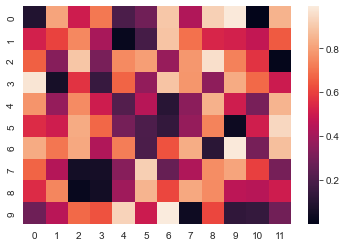

In [47]:
sns.heatmap(uniform_data)

<AxesSubplot:>

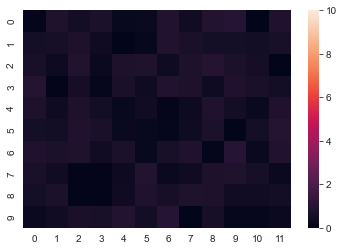

In [48]:
#thay đổi giới hạn mày sắc
sns.heatmap(uniform_data, vmin=0, vmax=10)

### 5. Biểu đồ Boxplot

<AxesSubplot:xlabel='total_bill'>

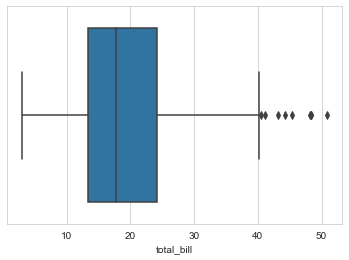

In [49]:
sns.boxplot(x=tips['total_bill'])

<AxesSubplot:xlabel='day', ylabel='total_bill'>

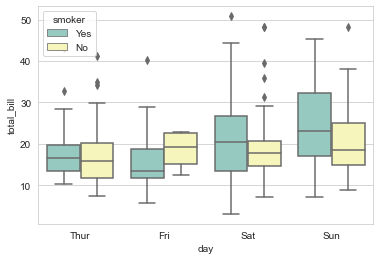

In [50]:
sns.boxplot(x='day', y='total_bill', hue='smoker', data = tips, palette='Set3')
#thứ 7 khách hàng không hút cho nhiều tiền tip hơn bth

<AxesSubplot:xlabel='total_bill', ylabel='day'>

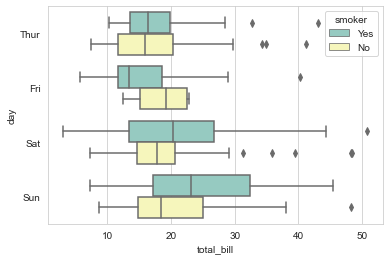

In [51]:
sns.boxplot(x='total_bill', y='day', hue='smoker', data = tips, palette='Set3')


#### 6. Biểu đồ cặp

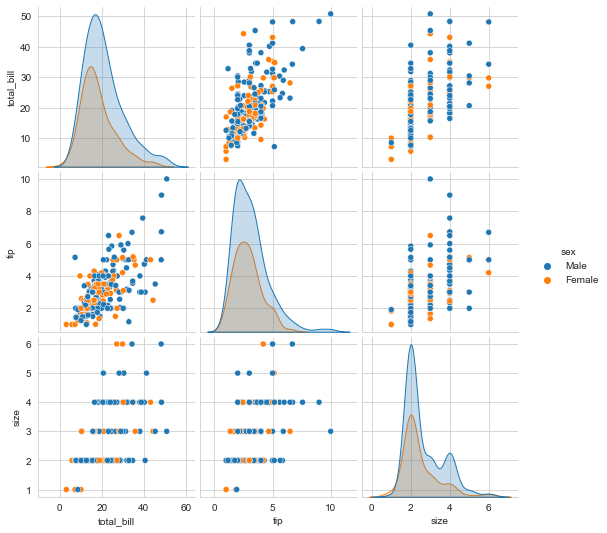

In [52]:
sns.pairplot(tips, hue='sex')
#hình đi cặp nhiều